In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# 数据导入与格式整理

In [2]:
# 导入数据
df = pd.read_table('CDNOW.txt',names=['user_id','order_date','order_number','order_price'],sep='\s+')
# user_id ：用户id   order_date ：购买日期 order_number : 购买数量  order_price : 购买金额

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.head()

,user_id,order_date,order_number,order_price
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [5]:
# 查看是否有缺失值
df.isnull().sum()

user_id         0
order_date      0
order_number    0
order_price     0
dtype: int64

In [6]:
# 查看数据类型
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
user_id         69659 non-null int64
order_date      69659 non-null int64
order_number    69659 non-null int64
order_price     69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [7]:
# 将order_date字段数据类型修改为datetime类型
df['order_date'] = pd.to_datetime(df['order_date'].astype('str'),format = '%Y-%m-%d')
df['month'] = df.order_date.values.astype('datetime64[M]')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 5 columns):
user_id         69659 non-null int64
order_date      69659 non-null datetime64[ns]
order_number    69659 non-null int64
order_price     69659 non-null float64
month           69659 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2)
memory usage: 2.7 MB


In [10]:
# 简单的描述统计
df.describe()

,user_id,order_number,order_price
count,69659.000000,69659.000000,69659.000000
mean,11470.854592,2.410040,35.893648
std,6819.904848,2.333924,36.281942
min,1.000000,1.000000,0.000000
25%,5506.000000,1.000000,14.490000
50%,11410.000000,2.000000,25.980000
75%,17273.000000,3.000000,43.700000
max,23570.000000,99.000000,1286.010000


- 该数据集总计有69,659笔订单
- 每笔订单的商品数量的中位数为2件，最少为1件，最多为99件,但第二个四份位数为3件。
- 每笔订单平均花费为35.9元，最大值为1286元，订单金额的标准差为36.3，可见订单金额的波动较大

# 订单商品数量分析

In [11]:
number_counts = pd.DataFrame(df['order_number'].value_counts())

In [12]:
number_counts = number_counts.sort_index()

In [13]:
number_counts.columns

Index(['order_number'], dtype='object')

In [14]:
number_counts['percent'] = number_counts['order_number']/number_counts['order_number'].sum()

In [15]:
number_counts.head(10)

,order_number,percent
1,31454,0.451543
2,16070,0.230695
3,9444,0.135575
4,5015,0.071994
5,2792,0.040081
6,1627,0.023357
7,1057,0.015174
8,684,0.009819
9,403,0.005785
10,293,0.004206


In [16]:
number_counts['percent'][:5].sum()

0.9298870210597339

- 商品数量小于等于5件的订单占到了93%

# 订单金额分析

In [17]:
price_counts = pd.DataFrame(pd.cut(df['order_price'],bins=[0,10,20,30,40,50,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300],include_lowest=True).value_counts())

In [18]:
price_counts = price_counts.sort_index()

In [19]:
price_counts['percent'] = price_counts['order_price']/price_counts['order_price'].sum()

In [52]:
price_counts

,order_price,percent
"(-0.001, 10.0]",3811,0.054709
"(10.0, 20.0]",24492,0.351599
"(20.0, 30.0]",13438,0.192911
"(30.0, 40.0]",7734,0.111027
"(40.0, 50.0]",6163,0.088474
"(50.0, 100.0]",10869,0.156032
"(100.0, 200.0]",2689,0.038602
"(200.0, 300.0]",343,0.004924
"(300.0, 400.0]",78,0.001120
"(400.0, 500.0]",21,0.000301


- 订单金额较多集中在(10,20]这个区间，占了35%

In [20]:
price_counts[:5].sum()

order_price    55638.000000
percent            0.798719
dtype: float64

- 0-50元的订单占到近八成

# 订单数量与金额的趋势分析 

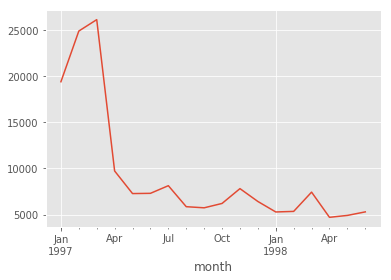

In [21]:
# 订单的商品数量随时间的变化
df.groupby('month').order_number.sum().plot()

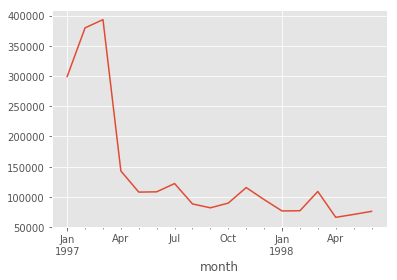

In [22]:
# 订单金额随时间的变化
df.groupby('month').order_price.sum().plot()

- 由上述两图可知，商品销量在一开始有大幅增长，但随着时间的增长，订单大幅下降后趋于稳定，可能是老用户流失较大，新用户增长过低

In [23]:
user_group = df.groupby('user_id')

In [24]:
user_group.sum().describe()

,order_number,order_price
count,23570.000000,23570.000000
mean,7.122656,106.080426
std,16.983531,240.925195
min,1.000000,0.000000
25%,1.000000,19.970000
50%,3.000000,43.395000
75%,7.000000,106.475000
max,1033.000000,13990.930000


- 每个用户购买数量的均值为7件，而中位数为3件，可见极值影响较为明显
- 每个用户购买的金额的均值为106.1元，而中位数为43.4元，极值影响也比较明显

# 用户贡献度分析

In [27]:
user_counts = pd.DataFrame(user_group.sum())

In [29]:
user_num_percent = user_counts['order_number']/user_counts['order_number'].sum()

In [33]:
user_num_percent.sort_values(ascending=False).describe()

count    23570.000000
mean         0.000042
std          0.000101
min          0.000006
25%          0.000006
50%          0.000018
75%          0.000042
max          0.006153
Name: order_number, dtype: float64